In [1]:
import pandas as pd

In [149]:
box_office = pd.read_html("https://en.wikipedia.org/wiki/List_of_Pixar_films", match="Box office gross", header=1)[0]
box_office

,Year,Film,Budget,U.S. and Canada,Other territories,Worldwide,Ref.
0,1995,Toy Story,$30 million,"$192,523,233","$172,747,718","$365,270,951",[53][54]
1,1998,A Bug's Life,$120 million,"$162,798,565","$200,460,294","$363,258,859",[55]
2,1999,Toy Story 2,$90 million,"$245,852,179","$265,506,097","$511,358,276",[56][57]
3,2001,"Monsters, Inc.",$115 million,"$289,916,256","$342,400,393","$632,316,649",[58]
4,2003,Finding Nemo,$94 million,"$339,714,978","$531,300,000","$871,014,978",[59]
5,2004,The Incredibles,$92 million,"$261,441,092","$370,165,621","$631,606,713",[60]
6,2006,Cars,$120 million,"$244,082,982","$217,900,167","$461,983,149",[61]
7,2007,Ratatouille,$150 million,"$206,445,654","$417,280,431","$623,726,085",[62]
8,2008,WALL-E,$180 million,"$223,808,164","$297,503,696","$521,311,860",[63]
9,2009,Up,$175 million,"$293,004,164","$442,094,918","$735,099,082",[64]


### Exercise
Clean the data, convert numeric columns to float, calculate a new column "results", group by year and plot using seaborn.

In [150]:
# remove irrelevant columns
box_office.drop(columns=["Ref.", "U.S. and Canada", "Other territories"], inplace=True)

# remove movies with unknown budgets
box_office = box_office[box_office["Budget"] != "—"]

box_office

,Year,Film,Budget,Worldwide
0,1995,Toy Story,$30 million,"$365,270,951"
1,1998,A Bug's Life,$120 million,"$363,258,859"
2,1999,Toy Story 2,$90 million,"$511,358,276"
3,2001,"Monsters, Inc.",$115 million,"$632,316,649"
4,2003,Finding Nemo,$94 million,"$871,014,978"
5,2004,The Incredibles,$92 million,"$631,606,713"
6,2006,Cars,$120 million,"$461,983,149"
7,2007,Ratatouille,$150 million,"$623,726,085"
8,2008,WALL-E,$180 million,"$521,311,860"
9,2009,Up,$175 million,"$735,099,082"


In [151]:
import re

def money_to_int(money_str):
    spectrum_pattern = re.compile(r"(\d+)–(\d+)")
    pattern_matches = spectrum_pattern.findall(money_str)
    if pattern_matches:
        min_num = int(pattern_matches[0][0])
        max_num = int(pattern_matches[0][1])
        mean_number = (min_num + max_num) / 2
        money_str = re.sub(spectrum_pattern, str(mean_number), money_str)
    irrelevant_chars = [",", " ", "\xa0", "$"]
    for char in irrelevant_chars:
        money_str = money_str.replace(char, "")
    # if money_str == "—":
    #     return 0.0
    if "million" in money_str:
        money_str = money_str.replace("million", "")
        return float(money_str) * 1_000_000
    else:
        return float(money_str)
    
box_office.loc[:, "Budget"] = box_office.loc[:, "Budget"].apply(money_to_int)
box_office.loc[:, "Worldwide"] = box_office.loc[:, "Worldwide"].apply(money_to_int)

# calculate "Result" column
box_office.loc[:, "Result"] = box_office.loc[:, "Worldwide"] - box_office.loc[:, "Budget"]

box_office

C:\Users\valte\AppData\Local\Temp\ipykernel_5708\252689123.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  box_office.loc[:, "Result"] = box_office.loc[:, "Worldwide"] - box_office.loc[:, "Budget"]


,Year,Film,Budget,Worldwide,Result
0,1995,Toy Story,30000000.0,365270951.0,335270951.0
1,1998,A Bug's Life,120000000.0,363258859.0,243258859.0
2,1999,Toy Story 2,90000000.0,511358276.0,421358276.0
3,2001,"Monsters, Inc.",115000000.0,632316649.0,517316649.0
4,2003,Finding Nemo,94000000.0,871014978.0,777014978.0
5,2004,The Incredibles,92000000.0,631606713.0,539606713.0
6,2006,Cars,120000000.0,461983149.0,341983149.0
7,2007,Ratatouille,150000000.0,623726085.0,473726085.0
8,2008,WALL-E,180000000.0,521311860.0,341311860.0
9,2009,Up,175000000.0,735099082.0,560099082.0


In [154]:
years = box_office.groupby("Year")
yearly_results = years["Result"].sum()
yearly_results

Year
1995     335270951.0
1998     243258859.0
1999     421358276.0
2001     517316649.0
2003     777014978.0
2004     539606713.0
2006     341983149.0
2007     473726085.0
2008     341311860.0
2009     560099082.0
2010     866969703.0
2011     359852396.0
2012     353983207.0
2013     543559607.0
2015     839818845.0
2016     828570889.0
2017     841012852.0
2018    1042805359.0
2019     873394593.0
2020     -74592148.0
2022    -128451959.0
2023     295488990.0
Name: Result, dtype: object

<Axes: xlabel='Year', ylabel='Result'>

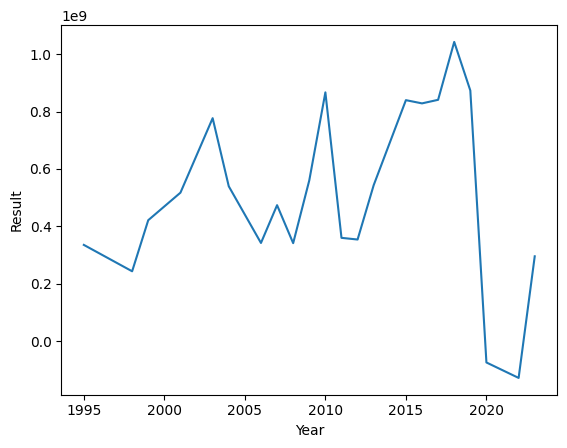

In [159]:
import seaborn as sns
sns.lineplot(data=yearly_results).set()